# Sentiment Analysis 1.0

In [41]:
# Importing the libraries
from nltk.tokenize import word_tokenize # for tokenizing into sentences and words
from sklearn.model_selection import cross_val_score # for cross validating the data
from sklearn.model_selection import train_test_split # for splitting data into training and testing set
from sklearn.feature_extraction.text import TfidfVectorizer # for extracting words as features using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # for classifying the data
from sklearn.linear_model import LogisticRegression # for classifying the data
from sklearn.neighbors import KNeighborsClassifier # for classifying the data
from sklearn import metrics # for calculating metrics like accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt # for plotting the graphs
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential # for initializing a Neural Network
from keras.layers import Dense # for adding hidden layers to the 
import numpy as np
from sklearn.model_selection import StratifiedKFold # for stratified k fold cross validation

# Reading the data set

In [42]:
# Reading the training dataset
with open('training.txt') as train_txt:
    raw_train_data = train_txt.read()
# Reading the testing dataset
with open('testdata.txt') as test_txt:
    raw_test_data = test_txt.read()
    

# Data Preprocessing

In [43]:
train_data_X = []
train_data_Y = []
test_data_X = []
# Splitting the training data data
for line in raw_train_data.split('\n'):
    if line.split('\t') != [""]:
        train_data_X.append(line.split('\t')[1])
        train_data_Y.append(int(line.split('\t')[0]))

print(len(train_data_X))
print(len(train_data_Y))
# Splitting the testing data
for line in raw_test_data.split('\n'):
    test_data_X.append(line)
print(len(test_data_X))

7086
7086
33053


# Choosing the Model

Now we would test the performance of following models using K Fold cross validation - 
    1. Multinomial Naive Bayes
    2. K Nearest Neighbours
    3. Logistic Regression
    4. Support Vector Machine
    5. Decision Tree
    6. Neural Network
    
Based on the performance, we will choose the best model. 

In [47]:
# Words as features using TF-IDF and training the model
tfidfVectorizer = TfidfVectorizer(stop_words = 'english')
train_features = tfidfVectorizer.fit_transform(train_data_X) # number of features - 1921
countVectorizer = CountVectorizer(stop_words='english')
train_features1 = countVectorizer.fit_transform(train_data_X) # number of features - 1921

#1 Multinomial Naive Bayes
mnbclassifier = MultinomialNB() 
scores = cross_val_score(mnbclassifier, train_features, train_data_Y, cv=10, scoring='accuracy')
scores1 = cross_val_score(mnbclassifier, train_features1, train_data_Y, cv=10, scoring='accuracy')
print("Accuracy of Multnomial naive bayes(TF-IDF) : %.2f%% (+/- %.2f%%)" % (np.mean(scores*100),np.std(scores*100)))
print("Accuracy of Multnomial naive bayes(Count) : %.2f%% (+/- %.2f%%)" % (np.mean(scores1*100),np.std(scores1*100)))

Accuracy of Multnomial naive bayes(TF-IDF) : 96.61% (+/- 5.41%)
Accuracy of Multnomial naive bayes(Count) : 97.05% (+/- 5.56%)


In [49]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(DTclassifier, train_features, train_data_Y, cv=10, scoring='accuracy')
scores1 = cross_val_score(DTclassifier, train_features1, train_data_Y, cv=10, scoring='accuracy')
print("Accuracy of Decision Tree (TF-IDF) : %.2f%% (+/- %.2f%%)" % (np.mean(scores*100),np.std(scores*100)))
print("Accuracy of Decision Tree (Count): %.2f%% (+/- %.2f%%)" % (np.mean(scores1*100),np.std(scores1*100)))

Accuracy of Decision Tree (TF-IDF) : 96.02% (+/- 6.59%)
Accuracy of Decision Tree (Count): 96.46% (+/- 6.16%)


In [50]:
SVCclassifier = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(SVCclassifier, train_features, train_data_Y, cv=10, scoring='accuracy')
scores1 = cross_val_score(SVCclassifier, train_features1, train_data_Y, cv=10, scoring='accuracy')
print("Accuracy of Support Vector Machine : %.2f%% (+/- %.2f%%)" % (np.mean(scores*100),np.std(scores*100)))
print("Accuracy of Support Vector Machine : %.2f%% (+/- %.2f%%)" % (np.mean(scores1*100),np.std(scores1*100)))

Accuracy of Support Vector Machine : 97.32% (+/- 4.13%)
Accuracy of Support Vector Machine : 98.50% (+/- 2.33%)


Accuracy of KNN (TF-IDF) 95.27% (+/- 5.54%) for k = 45 
Accuracy of KNN (Count) 95.49% (+/- 5.54%) for k = 7 


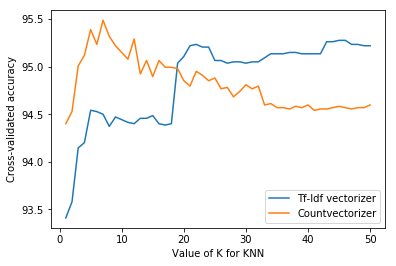

In [56]:
#2 K Nearest Neighbors
""" First we need to decide the value of k.
    For this, we will calculate the cross validated score for each k
    and search for the k with best results. 
"""
k_range = range(1,51)
k_scores = []
k_std = []
k_scores1 = []
k_std1 = []

for k in k_range:
    # Run KNeighborsClassifier with k neighbours
    knnclassifer = KNeighborsClassifier(n_neighbors=k)
    # Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knnclassifer, train_features, train_data_Y, cv=10, scoring='accuracy')
    scores1 = cross_val_score(knnclassifer, train_features1, train_data_Y, cv=10, scoring='accuracy')
    # Append mean of scores for k neighbors to k_scores list
    k_scores.append(np.mean(scores*100))
    k_scores1.append(np.mean(scores1*100))
    k_std.append(np.std(scores*100))
    k_std1.append(np.std(scores1*100))

# finding the k for which the score is maximum
max_k = k_scores.index(max(k_scores))+1
max_k1 = k_scores1.index(max(k_scores1))+1
std = k_std[max_k-1]
std1 = k_std1[max_k1-1]

print("Accuracy of KNN (TF-IDF) %.2f%% (+/- %.2f%%) for k = %d " % (max(k_scores),std,max_k))
print("Accuracy of KNN (Count) %.2f%% (+/- %.2f%%) for k = %d " % (max(k_scores1),std,max_k1))

%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores, label = 'Tf-Idf vectorizer')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

plt.plot(k_range, k_scores1, label = 'Countvectorizer')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend(loc='lower right')

We are looping through a range of values of k in order to find the best value for k. The graph above shows that varying the value of k after 40 doesnot lead to much improvement in the accuracy.

In [52]:
#3 Logistic Regression
lrclassifier = LogisticRegression()
scores = cross_val_score(lrclassifier, train_features, train_data_Y, cv=10, scoring='accuracy')
scores1 = cross_val_score(lrclassifier, train_features1, train_data_Y, cv=10, scoring='accuracy')
print("Accuracy of Logistic Regression (Tf-Idf) : %.2f%% (+/- %.2f%%)" % (np.mean(scores*100),np.std(scores*100)))
print("Accuracy of Logistic Regression (Count) : %.2f%% (+/- %.2f%%)" % (np.mean(scores1*100),np.std(scores1*100)))

Accuracy of Logistic Regression (Tf-Idf) : 97.21% (+/- 4.96%)
Accuracy of Logistic Regression (Count) : 97.63% (+/- 4.21%)


In [57]:
#4 Neural Network
# define a custom optimizer with learning rate 0.001
custom_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
counter = 0
for train, test in kfold.split(train_features, train_data_Y): 
    counter+=1
    nnclassifier = Sequential()
    nnclassifier.add(Dense(100, activation='relu', 
                input_dim=len(tfidfVectorizer.get_feature_names()))) # hidden layer with 100 nodes
    nnclassifier.add(Dense(1, activation='sigmoid'))
    nnclassifier.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

    nnclassifier.fit(train_features1.toarray()[train],np.asarray(train_data_Y)[train], epochs=5, batch_size=13)
    # evaluate the model
    scores = nnclassifier.evaluate(train_features1.toarray()[test], np.asarray(train_data_Y)[test], verbose=0)
    print("Fold %.d %s: %.2f%%" % (counter,nnclassifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("Accuracy of Neural Network with 1 hidden layer of 100 nodes %.2f%% " % 
      (np.mean(cvscores)))

Epoch 1/5
5668/5668 [==============================] - 3s - loss: 0.1567 - acc: 0.9730     
Epoch 2/5
5668/5668 [==============================] - 3s - loss: 0.0117 - acc: 0.9977     
Epoch 3/5
5668/5668 [==============================] - 3s - loss: 0.0037 - acc: 0.9996     
Epoch 4/5
5668/5668 [==============================] - 4s - loss: 0.0018 - acc: 1.0000     
Epoch 5/5
5668/5668 [==============================] - 3s - loss: 0.0010 - acc: 1.0000      
Fold 1 acc: 99.72%
Epoch 1/5
5669/5669 [==============================] - 4s - loss: 0.0551 - acc: 0.9806     
Epoch 2/5
5669/5669 [==============================] - 4s - loss: 0.0038 - acc: 0.9995     
Epoch 3/5
5669/5669 [==============================] - 4s - loss: 0.0015 - acc: 0.9998     
Epoch 4/5
5669/5669 [==============================] - 4s - loss: 0.0016 - acc: 0.9996     
Epoch 5/5
5669/5669 [==============================] - 4s - loss: 0.0014 - acc: 0.9996         
Fold 2 acc: 99.22%
Epoch 1/5
5669/5669 [================

Now as we see from the above comparison of performance of various models that the neural network with 1 hidden layer of 100 nodes outperformed the other three models.

# Training using the best model (Neural Network)

In [13]:
nnclassifier = Sequential()
nnclassifier.add(Dense(100, activation='relu', 
                input_dim=len(tfidfVectorizer.get_feature_names()))) # hidden layer with 100 nodes
nnclassifier.add(Dense(1, activation='sigmoid'))
nnclassifier.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
nnclassifier.fit(train_features.toarray(),np.asarray(train_data_Y), epochs=5, batch_size=13)

Epoch 1/5
7086/7086 [==============================] - 3s - loss: 0.0598 - acc: 0.9802     
Epoch 2/5
7086/7086 [==============================] - 3s - loss: 0.0036 - acc: 0.9997     
Epoch 3/5
7086/7086 [==============================] - 3s - loss: 0.0019 - acc: 0.9997     
Epoch 4/5
7086/7086 [==============================] - 2s - loss: 0.0013 - acc: 0.9997     
Epoch 5/5
7086/7086 [==============================] - 3s - loss: 8.4678e-04 - acc: 0.9999     


# Predicting the output of the test data

In [14]:
# Vectorizing the test data set using TF IDF
test_data_features = tfidfVectorizer.transform(test_data_X)
predictions = nnclassifier.predict(test_data_features.toarray())
# Now save the predictions to a file
with open('predictions.txt','w') as file:
    file.write('Predictions of test file using neural network - \n')
    for i in predictions:
        if(i>0.5):
            i=1
        else: 
            i=0
        file.write("%d" % i)
        file.write('\n')

# Saving the model

In [10]:
nnclassifier.save('model.h5')